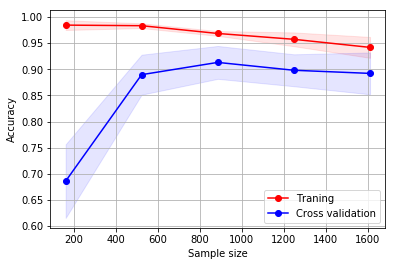

In [9]:
# Learning curve
import numpy as np
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt

dights = load_digits()
X, y = dights.data, dights.target
hypothesis = SGDClassifier(loss='log', shuffle=True, n_iter=6, penalty='l2', alpha=0.0001, random_state=3)
train_size, train_scores, test_scores = learning_curve(hypothesis, X, y, train_sizes=np.linspace(0.1,1.0,5), cv=10, 
                                                      scoring='accuracy', exploit_incremental_learning=False, n_jobs=-1)
mean_train = np.mean(train_scores, axis=1)
upper_train = np.clip(mean_train+ np.std(train_scores, axis=1), 0,1)
lower_train = np.clip(mean_train- np.std(train_scores, axis=1), 0,1)

mean_test = np.mean(test_scores, axis=1)
upper_test = np.clip(mean_test+ np.std(test_scores, axis=1), 0,1)
lower_test = np.clip(mean_test- np.std(test_scores, axis=1), 0,1)

plt.plot(train_size, mean_train, 'ro-', label="Traning")
plt.fill_between(train_size, upper_train, lower_train, alpha=0.1, color='r')

plt.plot(train_size, mean_test, 'bo-', label="Cross validation")
plt.fill_between(train_size, upper_test, lower_test, alpha=0.1, color='b')

plt.grid()

plt.xlabel("Sample size")
plt.ylabel("Accuracy")
plt.legend(loc='lower right', numpoints=1)
plt.show()

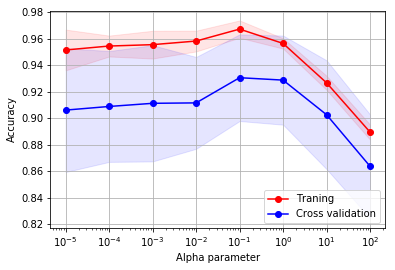

In [12]:
#Validation Curve
testing_range = np.logspace(-5,2,8)
X, y = dights.data, dights.target
hypothesis = SGDClassifier(loss='log', shuffle=True, n_iter=6, penalty='l2', alpha=0.0001, random_state=3)
train_scores, test_scores = validation_curve(hypothesis, X, y,param_name='alpha', param_range=testing_range, cv=10, 
                                                      scoring='accuracy', n_jobs=-1)
mean_train = np.mean(train_scores, axis=1)
upper_train = np.clip(mean_train+ np.std(train_scores, axis=1), 0,1)
lower_train = np.clip(mean_train- np.std(train_scores, axis=1), 0,1)

mean_test = np.mean(test_scores, axis=1)
upper_test = np.clip(mean_test+ np.std(test_scores, axis=1), 0,1)
lower_test = np.clip(mean_test- np.std(test_scores, axis=1), 0,1)

plt.semilogx(testing_range, mean_train, 'ro-', label="Traning")
plt.fill_between(testing_range, upper_train, lower_train, alpha=0.1, color='r')

plt.semilogx(testing_range, mean_test, 'bo-', label="Cross validation")
plt.fill_between(testing_range, upper_test, lower_test, alpha=0.1, color='b')

plt.grid()

plt.xlabel("Alpha parameter")
plt.ylabel("Accuracy")
plt.legend(loc='lower right', numpoints=1)
plt.show()